In [4]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from dateutil import parser
%matplotlib inline

In [5]:
#數據下載地址 http://labfile.oss.aliyuncs.com/courses/780/WeatherData.zip
df_ferrara = pd.read_csv('ferrara_270615.csv')  # Ferrara（费拉拉）
df_milano = pd.read_csv('milano_270615.csv')    # Torino（都灵）
df_mantova = pd.read_csv('mantova_270615.csv')  # Mantova（曼托瓦）
df_ravenna = pd.read_csv('ravenna_270615.csv')  # Milano（米兰）
df_torino = pd.read_csv('torino_270615.csv')    # Ravenna（拉文纳）
df_asti = pd.read_csv('asti_270615.csv')        # Asti（阿斯蒂）
df_bologna = pd.read_csv('bologna_270615.csv')  # Bologna（博洛尼亚）
df_piacenza = pd.read_csv('piacenza_270615.csv')# Piacenza（皮亚琴察）
df_cesena = pd.read_csv('cesena_270615.csv')    # Cesena（切塞纳）
df_faenza = pd.read_csv('faenza_270615.csv')    # Faenza（法恩莎）

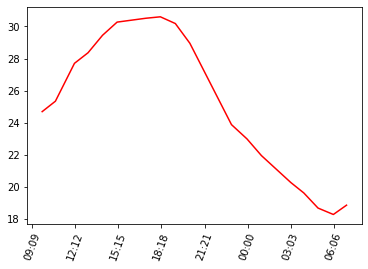

In [9]:
#取出我们要分析的温度和日期数据
x1=df_milano['day']
y1=df_milano['temp']
# 把日期数据转换成 datetime 的格式
day_milano=[parser.parse(x) for x in x1]
# 调用 subplot 函数, fig 是图像对象，ax 是坐标轴对象
fig,ax=plt.subplots()
#调整x轴坐标刻度，使其旋转70度，方便查看
plt.xticks(rotation=70)
#设定时间的格式
hours=mdates.DateFormatter('%H:%H')
#设定X轴显示的格式
ax.xaxis.set_major_formatter(hours)
ax.plot(day_milano,y1,'r')

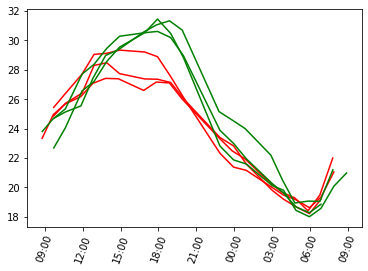

In [12]:
#同时来看几个不同城市的气温趋势，选择三个离海最近以及三个离海最远的城市
y1=df_ravenna['temp']
x1=df_ravenna['day']
y2=df_faenza['temp']
x2=df_faenza['day']
y3=df_cesena['temp']
x3=df_cesena['day']
y4=df_milano['temp']
x4=df_milano['day']
y5=df_asti['temp']
x5=df_asti['day']
y6=df_torino['temp']
x6=df_torino['day']

#把日期从 string 类型转化为标准的 datetime 类型
day_ravenna=[parser.parse(x) for x in x1]
day_faenza=[parser.parse(x) for x in x2]
day_cesena=[parser.parse(x) for x in x3]
day_milano=[parser.parse(x) for x in x4]
day_asti=[parser.parse(x) for x in x5]
day_torino=[parser.parse(x) for x in x6]

#调用 subplots() 函数，重新定义 fig, ax 变量
fig,ax=plt.subplots()
plt.xticks(rotation=70)

hours=mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)

#这里需要画出三根线，所以需要三组参数， 'g'代表'green'
ax.plot(day_ravenna,y1,'r',day_faenza,y2,'r',day_cesena,y3,'r')
ax.plot(day_milano,y4,'g',day_asti,y5,'g',day_torino,y6,'g')
#离海最近的三个城市的气温曲线使用红色，而离海最远的三个城市的曲线使用绿色

In [15]:
# dist 是一个装城市距离海边距离的列表
dist=[df_ravenna['dist'][0],df_cesena['dist'][0],
     df_faenza['dist'][0],df_ferrara['dist'][0],
     df_bologna['dist'][0],df_mantova['dist'][0],
     df_piacenza['dist'][0],df_milano['dist'][0],
     df_asti['dist'][0],df_torino['dist'][0]]

# temp_max 是一个存放每个城市最高温度的列表
temp_max=[df_ravenna['temp'].max(),df_cesena['temp'].max(),
          df_faenza['temp'].max(),df_ferrara['temp'].max(),
          df_bologna['temp'].max(),df_mantova['temp'].max(),
          df_piacenza['temp'].max(),df_milano['temp'].max(),
          df_asti['temp'].max(),df_torino['temp'].max()]

# temp_min 是一个存放每个城市最低温度的列表
temp_min=[df_ravenna['temp'].min(),df_cesena['temp'].min(),
          df_faenza['temp'].min(),df_ferrara['temp'].min(),
          df_bologna['temp'].min(),df_mantova['temp'].min(),
          df_piacenza['temp'].min(),df_milano['temp'].min(),
          df_asti['temp'].min(),df_torino['temp'].min()]

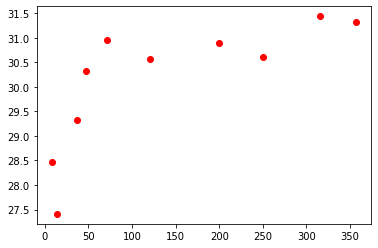

In [16]:
#先把最高温画出来
fig,ax=plt.subplots()
ax.plot(dist,temp_max,'ro')
#海洋对气象数据具有一定程度的影响这个假设是正确的
#海洋的影响衰减得很快，离海 60～70 公里开外，气温就已攀升到高位

In [18]:
#用线性回归算法得到两条直线，分别表示两种不同的气温趋势
from sklearn.svm import SVR
#dist1是靠近海的城市集合，dist2是远离海洋的城市集合
dist1=dist[0:5]
dist2=dist[5:10]

# 改变列表的结构，dist1现在是5个列表的集合
# 之后我们会看到 nbumpy 中 reshape() 函数也有同样的作用
dist1=[[x] for x in dist1]
dist2=[[x] for x in dist2]

# temp_max1 是 dist1 中城市的对应最高温度
temp_max1=temp_max[0:5]
# temp_max2 是 dist2 中城市的对应最高温度
temp_max2=temp_max[5:10]

# 我们调用SVR函数，在参数中规定了使用线性的拟合函数
# 并且把 C 设为1000来尽量拟合数据（因为不需要精确预测不用担心过拟合）
svr_lin1=SVR(kernel='linear',C=1e3)
svr_lin2=SVR(kernel='linear',C=1e3)

# 加入数据，进行拟合
svr_lin1.fit(dist1,temp_max1)
svr_lin2.fit(dist2,temp_max2)

xp1=np.arange(10,100,10).reshape((9,1))
xp2=np.arange(50,400,50).reshape((7,1))
#predict() 函数的只能接受一个 N 1 的列表，返回一个 1 N 的列表
yp1=svr_lin1.predict(xp1)
yp2=svr_lin2.predict(xp2)


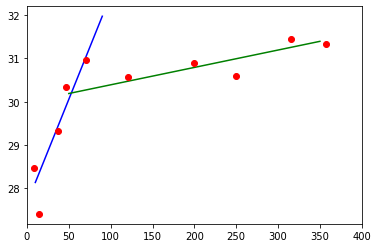

In [23]:
#限制了 x 轴的取值范围
fig,ax=plt.subplots()
ax.set_xlim(0,400)

#画出图像
ax.plot(xp1,yp1,c='b',label='Strong sea effect')
ax.plot(xp2,yp2,c='g',label='Light sea effect')
ax.plot(dist,temp_max,'ro')

#离海 60 公里以内，气温上升速度很快，从 28 度陡升至 31 度，随后增速渐趋缓和（如果还继续增长的话）,更长的距离才会有小幅上升。
#这两种趋势可分别用两条直线来表示，直线的表达式为： 𝑦=𝑎𝑥+𝑏
#其中 a 为斜率，b 为截距

In [31]:
print(svr_lin1.coef_)#斜率
print(svr_lin1.intercept_)#截距
print(svr_lin2.coef_)
print(svr_lin2.intercept_)

[[0.04794118]]
[27.65617647]
[[0.00401274]]
[29.98745223]


In [32]:
#将这两条直线的交点作为受海洋影响和不受海洋影响的区域的分界点，或者至少是海洋影响较弱的分界点
from scipy.optimize import fsolve

[x,y]=[53 30]


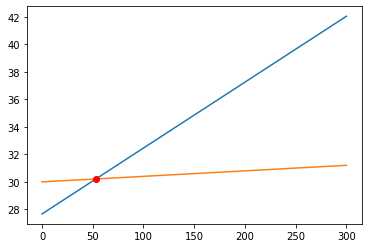

In [36]:
#定义了第一条拟合直线
def line1(x):
    a1=svr_lin1.coef_[0][0]
    b1=svr_lin1.intercept_[0]
    return a1*x+b1

#定义了第二条拟合直线
def line2(x):
    a2=svr_lin2.coef_[0][0]
    b2=svr_lin2.intercept_[0]
    return a2*x+b2

# 定义了找到两条直线的交点的 x 坐标的函数
def findIntersection(fun1,fun2,x0):
    return fsolve(lambda x: fun1(x) - fun2(x),x0)

result=findIntersection(line1,line2,0.0)
print("[x,y]=[%d %d]"%(result,line1(result)))

# x = [0,10,20, ..., 300]
x=np.linspace(0,300,31)
plt.plot(x,line1(x),x,line2(x),result,line1(result),'ro')
#你可以说海洋对气温产生影响的平均距离（该天的情况）为 53 公里

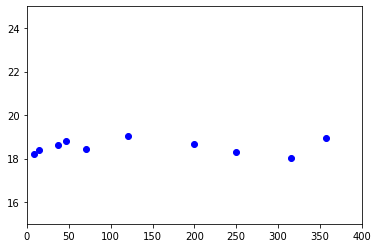

In [37]:
## axis 函数规定了 x 轴和 y 轴的取值范围
plt.axis((0,400,15,25))
plt.plot(dist,temp_min,'bo')
#分析最低气温
#很明显夜间或早上 6 点左右的最低温与海洋无关

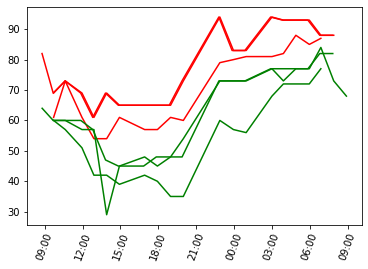

In [39]:
#湿度数据分析
y1=df_ravenna['humidity']
x1=df_ravenna['day']
y2=df_faenza['humidity']
x2=df_faenza['day']
y3=df_cesena['humidity']
x3=df_cesena['day']
y4=df_milano['humidity']
x4=df_milano['day']
y5=df_asti['humidity']
x5=df_asti['day']
y6=df_torino['humidity']
x6=df_torino['day']

# 重新定义 fig 和 ax 变量
fig,ax=plt.subplots()
plt.xticks(rotation=70)

# 把时间从 string 类型转化为标准的 datetime 类型
day_ravenna=[parser.parse(x) for x in x1]
day_faenza=[parser.parse(x) for x in x2]
day_cesena=[parser.parse(x) for x in x3]
day_milano=[parser.parse(x) for x in x4]
day_asti=[parser.parse(x) for x in x5]
day_torino=[parser.parse(x) for x in x6]

# 规定时间的表示方式
hours = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(hours)

#表示在图上
ax.plot(day_ravenna,y1,'r',day_faenza,y2,'r',day_cesena,y3,'r')
ax.plot(day_milano,y4,'g',day_asti,y5,'g',day_torino,y6,'g')
#紅色近海城市,綠色內陸城市
#近海城市的湿度要大于内陆城市，全天湿度差距在 20% 左右

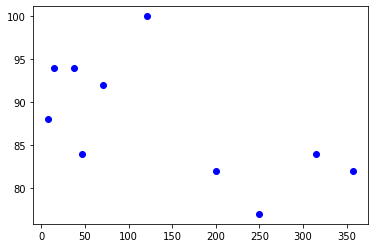

In [40]:
#獲取最大濕度數據
hum_max=[df_ravenna['humidity'].max(),df_cesena['humidity'].max(),
         df_faenza['humidity'].max(),df_ferrara['humidity'].max(),
         df_bologna['humidity'].max(),df_mantova['humidity'].max(),
         df_piacenza['humidity'].max(),df_milano['humidity'].max(),
         df_asti['humidity'].max(),df_torino['humidity'].max()]
#看一下湿度的极值和离海远近之间的关系
plt.plot(dist,hum_max,'bo')
#把10 个城市的最大湿度与离海远近之间的关系做成图表

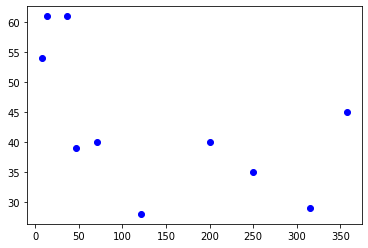

In [41]:
#獲取最小濕度
hum_min=[df_ravenna['humidity'].min(),df_cesena['humidity'].min(),
         df_faenza['humidity'].min(),df_ferrara['humidity'].min(),
         df_bologna['humidity'].min(),df_mantova['humidity'].min(),
         df_piacenza['humidity'].min(),df_milano['humidity'].min(),
         df_asti['humidity'].min(),df_torino['humidity'].min()]

plt.plot(dist,hum_min,'bo')
# 近海城市无论是最大还是最小湿度都要高于内陆城市。
# 我们还不能说湿度和距离之间存在线性关系或者其他能用曲线表示的关系。
# 我们采集的数据点数量（10）太少，不足以描述这类趋势

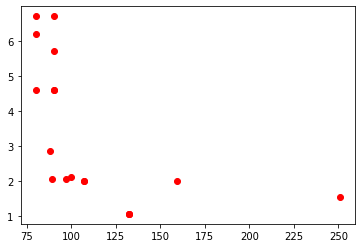

In [42]:
#风向频率玫瑰图
#在我们采集的每个城市的气象数据中,两个与风有关：风力（风向）and 风速
#风速不仅跟一天的时间段相关联，还与一个介于 0~360 度的方向有关
#为了更好地分析这类数据，有必要将其做成可视化形式
#对于风力数据，将其制作成使用笛卡儿坐标系的线性图不再是最佳选择
plt.plot(df_ravenna['wind_deg'],df_ravenna['wind_speed'],'ro')
#做成散点图,很显然该图的表现力也有不足

In [43]:
#要表示呈 360 度分布的数据点，最好使用另一种可视化方法：极区图
#首先，创建一个直方图，也就是将 360 度分为八个面元，每个面元为 45 度
#把所有的数据点分到这八个面元中
#histogram() 函数返回结果中的数组 hist 为落在每个面元的数据点数量
#返回结果中的数组 bins 定义了 360 度范围内各面元的边界
hist,bins=np.histogram(df_ravenna['wind_deg'],8,[0,360])
print(hist)
print(bins)

[ 0  5 11  1  0  1  0  0]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


In [44]:
#values 数组，指的是想为其作图的数据，也就是这里的 hist 数组
# city_name 为字符串类型，指定图表标题所用的城市名称
#max_value 为整型，指定最大的蓝色值
#扇形的颜色越接近蓝色，值越大
def showRoseWind(values,city_name,max_value):
    N=8
    # theta = [pi*1/4, pi*2/4, pi*3/4, ..., pi*2]
    theta=np.arange(2*np.pi / 16, 2*np.pi, 2*np.pi/8)
    radii=np.array(values)
    
    # 绘制极区图的坐标系
    plt.axes([0.025,0.025,0.95,0.95],polar=True)
    
    # 列表中包含的是每一个扇区的 rgb 值，x越大，对应的color越接近蓝色
    colors=[(1-x/max_value,1-x/max_value,0.75) for x in radii]
    
    # 画出每个扇区
    plt.bar(theta,radii,width=(2*np.pi/N),bottom=0.0,color=colors)
    
    #设置极区图的标题
    plt.title(city_name,x=0.2,fontsize=20)

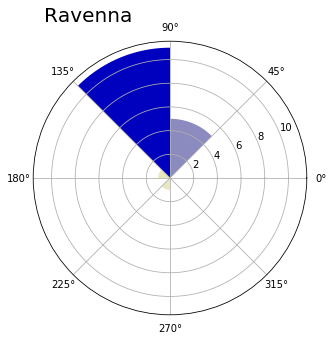

In [45]:
showRoseWind(hist,'Ravenna',max(hist))
#在每个区域中，用半径长度可以改变的扇形表示一个数值，半径越长，扇形所表示的数值就越大
#半徑越长，扇形跨度越大，颜色越接近于深蓝色

[7 2 3 3 3 2 0 0]


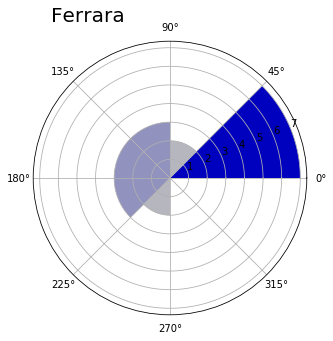

In [46]:
hist,bin=np.histogram(df_ferrara['wind_deg'],8,[0,360])
print(hist)
showRoseWind(hist,'Ferrara',max(hist))

In [48]:
#计算将 360 度范围划分成的八个面元中每个面元的平均风速
def RoseWind_Speed(df_city):
    # degs = [45, 90, ..., 360]
    degs=np.arange(45,361,45)
    tmp=[]
    for deg in degs:
        # 获取 wind_deg 在指定范围的风速平均值数据
        # 获取的是风向大于 `deg-46` 度和风向小于 `deg` 的数据
        tmp.append(df_city[(df_city['wind_deg']>(deg-46))& 
                           (df_city['wind_deg']<deg)]['wind_speed'].mean())
    return np.array(tmp)

D:\Users\user\anaconda3\lib\site-packages\matplotlib\projections\polar.py:55: RuntimeWarning: invalid value encountered in greater_equal
  r = np.where(r >= 0, r, np.nan)


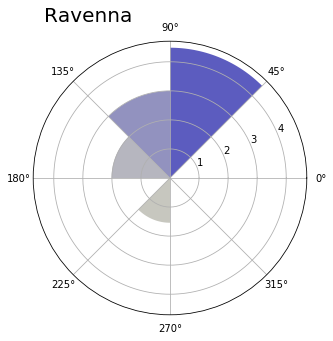

In [49]:
# RoseWind_Speed() 函数返回一个包含八个平均风速值的 NumPy 数组。该数组将作为先前定义的 
# showRoseWind() 函数的第一个参数，这个函数是用来绘制极区图的
showRoseWind(RoseWind_Speed(df_ravenna),'Ravenna',max(hist))